In [2]:
#Set working directory for google colab
!pwd
!git clone https://github.com/zrosen3/Colombian-peso-counterfeit-detection.git 
%cd /content/Colombian-peso-counterfeit-detection/Code       
!pwd      

/content
Cloning into 'Colombian-peso-counterfeit-detection'...
remote: Enumerating objects: 21085, done.
remote: Counting objects: 100% (120/120), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 21085 (delta 62), reused 62 (delta 24), pack-reused 20965
Receiving objects: 100% (21085/21085), 441.08 MiB | 17.74 MiB/s, done.
Resolving deltas: 100% (156/156), done.
Updating files: 100% (62415/62415), done.
/content/Colombian-peso-counterfeit-detection/Code
/content/Colombian-peso-counterfeit-detection/Code


In [4]:
#Load libraries
import matplotlib.pyplot as plt #For plotting our visualizations
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import cv2
from PIL import Image
import seaborn as sns
import common_functions as cf
tf.random.set_seed(1234)


In [51]:
#Load data
train_ds, test_ds, validation_ds, class_names = cf.LoadData()

Found 12479 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.
Found 4160 files belonging to 13 classes.


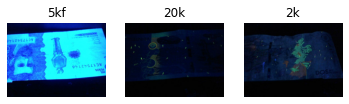

In [53]:
#Look at data
#How to make reproducible?
cf.PeakData(train_ds, class_names = class_names, nrows = 1, ncols = 3)


In [30]:
#Look at distribution of data between classes
# Get the number of examples in the dataset
num_examples = train_ds.reduce(0, lambda x, _: x + 1).numpy()
num_classes = 13
# Get the class distribution by reducing over the dataset
class_counts = train_ds.reduce(
    initial_state=tf.zeros(shape=(num_classes,), dtype=tf.int32),
    reduce_func=lambda state, example: tf.math.bincount(
        example['label'], minlength=num_classes) + state,
)

# Print out the class distribution
print('Class distribution in training data:')
for class_idx, class_count in enumerate(class_counts.numpy()):
    print(f'Class {class_idx}: {class_count} examples')


TypeError: ignored